In [8]:
#Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import  train_test_split

In [9]:
#Warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
#Mouting Google Drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#Importing Data
data=pd.read_csv("/content/drive/MyDrive/breast-cancer-data.xls")

In [12]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.2419
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.1812
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.2069
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2597
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1809
...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.1726
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.1752
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.1590
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.2397


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                569 non-null    int64  
 1   diagnosis         569 non-null    object 
 2   radius_mean       569 non-null    float64
 3   texture_mean      569 non-null    float64
 4   perimeter_mean    569 non-null    float64
 5   area_mean         569 non-null    float64
 6   smoothness_mean   569 non-null    float64
 7   compactness_mean  569 non-null    float64
 8   symmetry_mean     569 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 40.1+ KB


In [14]:
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
symmetry_mean,0


In [15]:
data.duplicated().sum()

0

In [16]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean'],
      dtype='object')

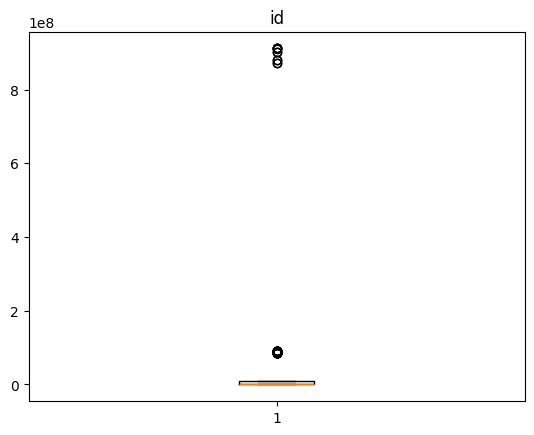

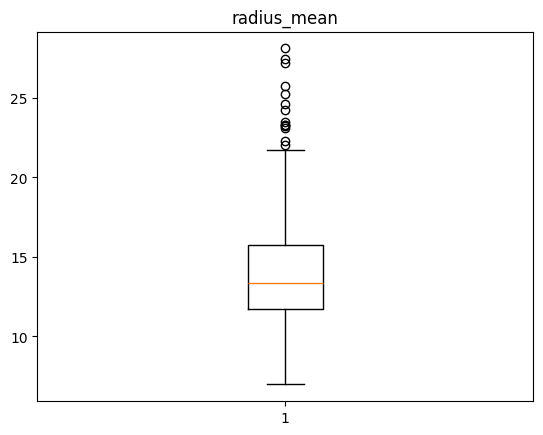

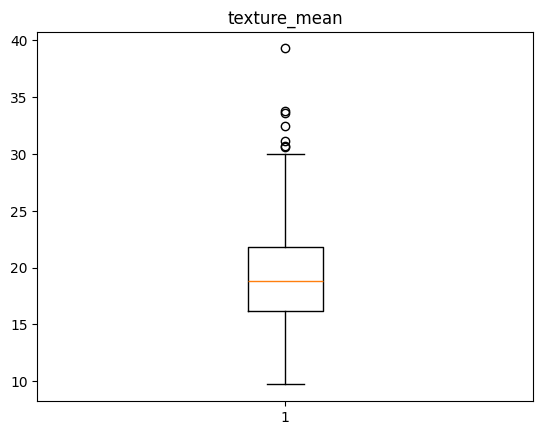

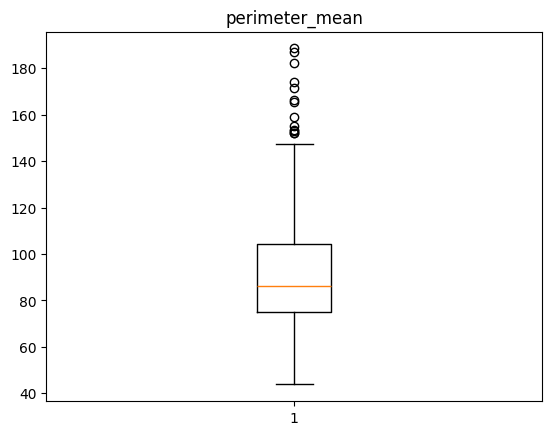

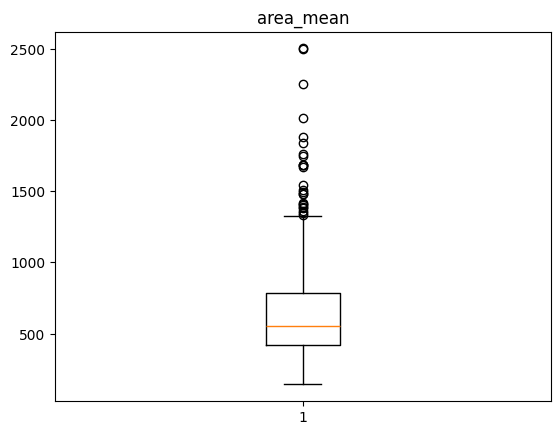

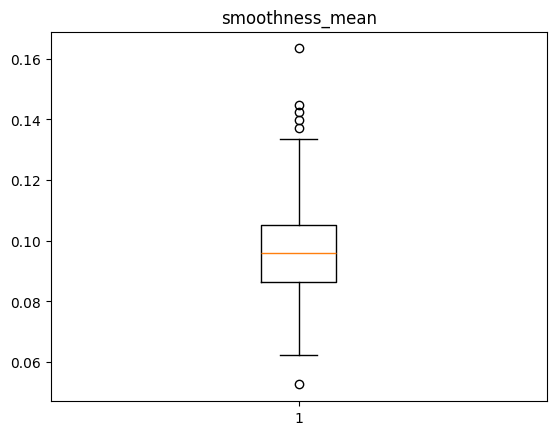

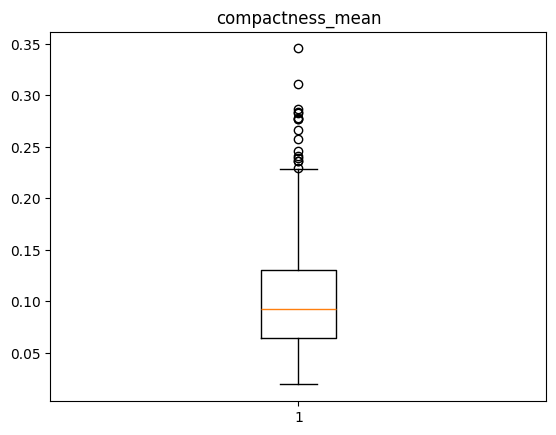

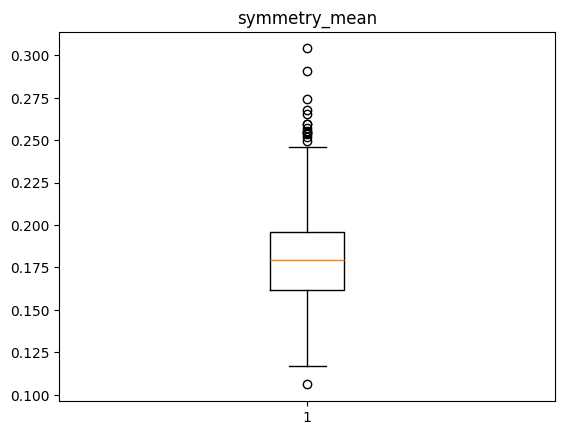

In [17]:
for col in data.columns:
    if data[col].dtype!="object":
        plt.boxplot(data[col])
        plt.title(col)
        plt.show()

In [18]:
out_cols=['radius_mean', 'texture_mean', 'perimeter_mean','area_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [19]:
for col in out_cols:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    IQR=q3-q1
    LL=q1-1.5*IQR
    UL=q3+1.5*IQR
    data=data[(data[col]>=LL) & (data[col]<=UL)]

In [20]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.2069
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.2087
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.1794
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.2196
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.2350
...,...,...,...,...,...,...,...,...,...
557,925236,B,9.423,27.88,59.26,271.3,0.08123,0.04971,0.1742
558,925277,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.1454
559,925291,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.1388
560,925292,B,14.050,27.15,91.38,600.4,0.09929,0.11260,0.1537


In [21]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

In [23]:
for col in data.columns:
    if data[col].dtype=="object":
        data[col]=le.fit_transform(data[col])
        print(le.classes_)

['B' 'M']


In [24]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean
2,84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.2069
5,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.2087
6,844359,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.1794
7,84458202,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.2196
8,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.2350
...,...,...,...,...,...,...,...,...,...
557,925236,0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.1742
558,925277,0,14.590,22.68,96.39,657.1,0.08473,0.13300,0.1454
559,925291,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.1388
560,925292,0,14.050,27.15,91.38,600.4,0.09929,0.11260,0.1537


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483 entries, 2 to 566
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                483 non-null    int64  
 1   diagnosis         483 non-null    int64  
 2   radius_mean       483 non-null    float64
 3   texture_mean      483 non-null    float64
 4   perimeter_mean    483 non-null    float64
 5   area_mean         483 non-null    float64
 6   smoothness_mean   483 non-null    float64
 7   compactness_mean  483 non-null    float64
 8   symmetry_mean     483 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 37.7 KB


In [26]:
#feature selection
data.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean
id,1.000000,0.007657,-0.009396,0.073392,-0.010312,-0.000418,-0.036016,-0.024580,-0.061577
diagnosis,0.007657,1.000000,0.700596,0.401435,0.717738,0.720528,0.323772,0.553622,0.297552
radius_mean,-0.009396,0.700596,1.000000,0.268283,0.997812,0.992385,0.094317,0.440613,0.086200
texture_mean,0.073392,0.401435,0.268283,1.000000,0.277844,0.281461,-0.011534,0.234776,0.096939
perimeter_mean,-0.010312,0.717738,0.997812,0.277844,1.000000,0.991295,0.131553,0.494944,0.115419
area_mean,-0.000418,0.720528,0.992385,0.281461,0.991295,1.000000,0.099166,0.445166,0.101509
smoothness_mean,-0.036016,0.323772,0.094317,-0.011534,0.131553,0.099166,1.000000,0.632665,0.490228
compactness_mean,-0.024580,0.553622,0.440613,0.234776,0.494944,0.445166,0.632665,1.000000,0.494782
symmetry_mean,-0.061577,0.297552,0.086200,0.096939,0.115419,0.101509,0.490228,0.494782,1.000000


<Axes: >

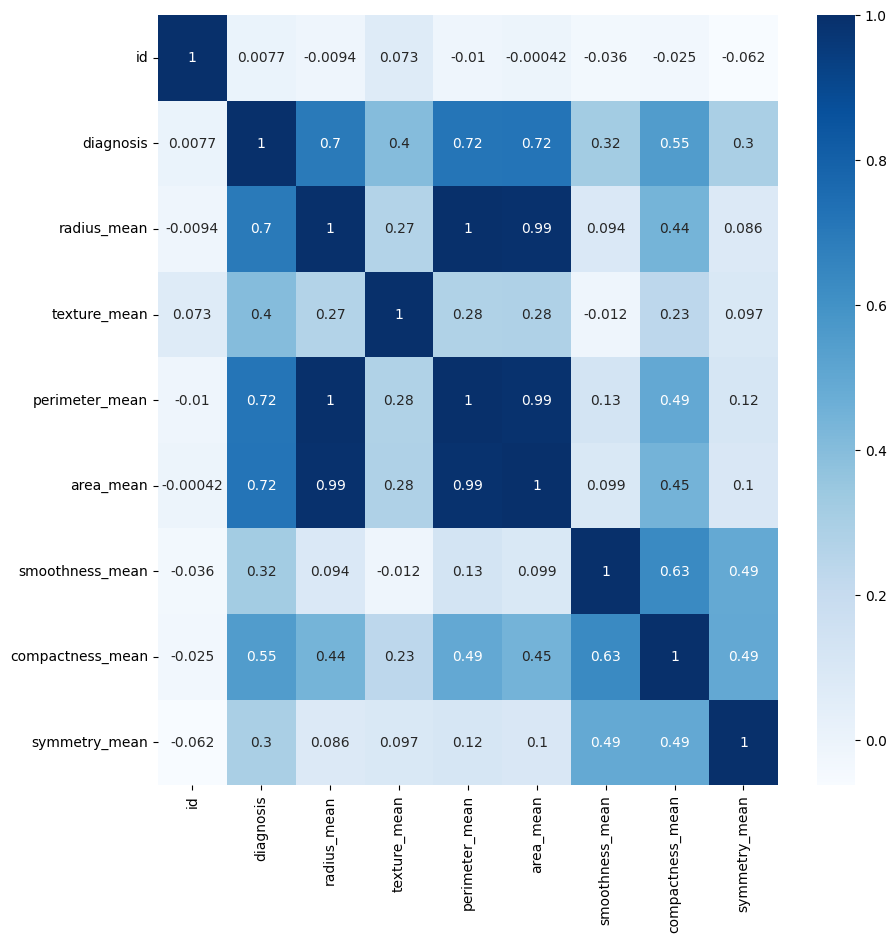

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap="Blues")

In [28]:
#VIF-Variance Inflation Factor

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
x=data.drop(["diagnosis"],axis=1)
x

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean
2,84300903,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.2069
5,843786,12.450,15.70,82.57,477.1,0.12780,0.17000,0.2087
6,844359,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.1794
7,84458202,13.710,20.83,90.20,577.9,0.11890,0.16450,0.2196
8,844981,13.000,21.82,87.50,519.8,0.12730,0.19320,0.2350
...,...,...,...,...,...,...,...,...
557,925236,9.423,27.88,59.26,271.3,0.08123,0.04971,0.1742
558,925277,14.590,22.68,96.39,657.1,0.08473,0.13300,0.1454
559,925291,11.510,23.93,74.52,403.5,0.09261,0.10210,0.1388
560,925292,14.050,27.15,91.38,600.4,0.09929,0.11260,0.1537


In [31]:
y=data[["diagnosis"]]
y

,diagnosis
2,1
5,1
6,1
7,1
8,1
...,...
557,0
558,0
559,0
560,0


In [32]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,id,1.063999
1,radius_mean,39805.686256
2,texture_mean,25.373131
3,perimeter_mean,44143.845002
4,area_mean,179.536338
5,smoothness_mean,103.895747
6,compactness_mean,80.333894
7,symmetry_mean,82.790730


In [33]:
x.drop(["perimeter_mean"],axis=1,inplace=True)

In [34]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,id,1.063534
1,radius_mean,385.130287
2,texture_mean,25.373128
3,area_mean,125.110031
4,smoothness_mean,99.675795
5,compactness_mean,14.492391
6,symmetry_mean,81.036548


In [35]:
x.drop(["radius_mean"],axis=1,inplace=True)

In [36]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,id,1.063479
1,texture_mean,22.136027
2,area_mean,9.039358
3,smoothness_mean,67.327651
4,compactness_mean,10.802643
5,symmetry_mean,68.086828


In [37]:
x.drop(["smoothness_mean"],axis=1,inplace=True)

In [38]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,id,1.062653
1,texture_mean,21.735833
2,area_mean,9.029222
3,compactness_mean,9.662427
4,symmetry_mean,24.457812


In [39]:
x.drop(["symmetry_mean"],axis=1,inplace=True)

In [40]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,id,1.060891
1,texture_mean,9.264585
2,area_mean,9.016627
3,compactness_mean,7.990865


In [41]:
x.drop(["texture_mean"],axis=1,inplace=True)

In [42]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,id,1.045663
1,area_mean,6.377604
2,compactness_mean,6.348383


In [43]:
x.drop(["area_mean"],axis=1,inplace=True)

In [44]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,id,1.040601
1,compactness_mean,1.040601


We can see that multicolinearity value of all the features are within 5. We can go ahead and split the data for training and testing.

In [45]:
#Splitting the data into train and test

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [47]:
x_train

,id,compactness_mean
7,84458202,0.16450
242,883852,0.13250
367,9011495,0.07175
73,859983,0.12800
131,8670,0.12230
...,...,...
127,866203,0.08028
319,894335,0.03454
412,905539,0.06053
509,915460,0.18700


In [48]:
y_train

,diagnosis
7,1
242,0
367,0
73,1
131,1
...,...
127,1
319,0
412,0
509,1


In [49]:
x_test

,id,compactness_mean
487,913505,0.14480
552,924084,0.04234
213,881094802,0.11460
522,91789,0.04413
350,899187,0.03630
...,...,...
137,868682,0.06889
57,857793,0.13650
27,852781,0.10660
523,917896,0.10700


In [50]:
y_test

,diagnosis
487,1
552,0
213,1
522,0
350,0
...,...
137,0
57,1
27,1
523,0


Model Building

In [51]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [52]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [53]:
#Evaluating the model

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[98,  0],
       [47,  0]])

In [55]:
accuracy_score(y_test,y_pred)

0.6758620689655173

<Axes: >

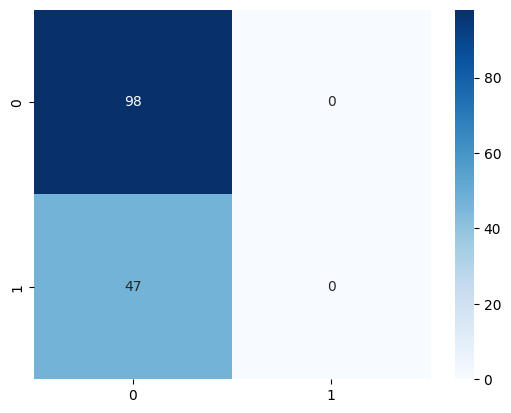

In [56]:
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

In [57]:
#checking the overfitting by taking training data
y_pred_train=model.predict(x_train)
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [58]:
accuracy_score(y_train,y_pred_train)

0.7248520710059172

In [59]:
x_test["Actual"]=y_test
x_test["Pred"]=y_pred
x_test

,id,compactness_mean,Actual,Pred
487,913505,0.14480,1,0
552,924084,0.04234,0,0
213,881094802,0.11460,1,0
522,91789,0.04413,0,0
350,899187,0.03630,0,0
...,...,...,...,...
137,868682,0.06889,0,0
57,857793,0.13650,1,0
27,852781,0.10660,1,0
523,917896,0.10700,0,0


In [60]:
x_test[x_test["Actual"]!=x_test["Pred"]]

,id,compactness_mean,Actual,Pred
487,913505,0.14480,1,0
213,881094802,0.11460,1,0
446,9110732,0.13140,1,0
489,913535,0.07112,1,0
16,848406,0.07200,1,0
205,879523,0.09588,1,0
385,90291,0.06636,1,0
41,855563,0.12180,1,0
45,857010,0.16860,1,0
86,86135501,0.09947,1,0
